<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_aasignment_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from sklearn import datasets
import pandas as pd


boston = datasets.load_boston(return_X_y=False)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

In [30]:
train_dataset = boston_df.sample(frac=0.3)
dataframe = boston_df.drop(train_dataset.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

print("train dataset\n", train_dataset)
# print("validation dataset\n", validation_dataset)
# print("test dataset\n", test_dataset)


train dataset
          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
184   0.08308   0.0   2.46   0.0  0.488  ...  193.0     17.8  391.00  13.98   26.4
495   0.17899   0.0   9.69   0.0  0.585  ...  391.0     19.2  393.29  17.60   23.1
248   0.16439  22.0   5.86   0.0  0.431  ...  330.0     19.1  374.71   9.52   24.5
420  11.08740   0.0  18.10   0.0  0.718  ...  666.0     20.2  318.75  15.02   16.7
143   4.09740   0.0  19.58   0.0  0.871  ...  403.0     14.7  396.90  26.42   15.6
..        ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
125   0.16902   0.0  25.65   0.0  0.581  ...  188.0     19.1  385.02  14.81   21.4
335   0.03961   0.0   5.19   0.0  0.515  ...  224.0     20.2  396.90   8.01   21.1
334   0.03738   0.0   5.19   0.0  0.515  ...  224.0     20.2  389.40   6.75   20.7
2     0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
438  13.67810   0.0  18.10   0.0  0.740  ...  666.0     20.2   68.95  34

In [31]:
import numpy as np

In [32]:
def hypothesis(w, index, dataset):
  sample =dataset[index][:-1]
  sample = np.concatenate([[1], sample])
  array = np.multiply(w, sample)
  return np.sum(array)


w=[1,1,1]
dataset = np.array([[1,2,6], [2,10,24]])

print(hypothesis(w, 0, dataset))
print(dataset)

4
[[ 1  2  6]
 [ 2 10 24]]


In [33]:
# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, i, dataset))
  
  return np.array(predicted)

predicted = predicted_values(w, dataset)

print(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

MSE(predicted, dataset[:,-1])

[ 4 13]


31.25

In [34]:
# to update w using batch gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w


#w=update_parameter(w, 0.1, dataset)
print(update_parameter(w, 0.1, dataset))


[1.65, 2.2, 6.7]


In [35]:
# to update w using stochastic gradient decendent
def update_parameter_stochastic(w, alpha, dataset):
  np.random.shuffle(dataset)
  m = len(dataset)
  for j in range(m):
    hy = hypothesis(w, j, dataset)
    w[0] = w[0] - (alpha /m)*(hy- dataset[:, -1][j])
    for i in range(1, len(w)):
      w[i] = w[i] - (alpha /m)*((hy- dataset[:, -1][j])* dataset[:, i-1][j])
  return w
print(update_parameter_stochastic([1,1,1], 0.1, dataset))

[1.0175, 1.5675000000000001, 5.4350000000000005]


In [36]:
def linear_regression(epoch, alpha, rho, w, train_dataset):
  epochs_MSE=[]
  pre_MSE = 0
  curr_MSE = 0
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter_stochastic(w, alpha, train_dataset)

    epochs_MSE.append(curr_MSE)

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
  return w, epochs_MSE


In [37]:
from sklearn import preprocessing
w=[1 for _ in range(14)]

normalized = preprocessing.normalize(train_dataset.to_numpy())
w1, trains_MSE1 = linear_regression(10, 0.1, 0.5, w, normalized)


validation = preprocessing.normalize(validation_dataset.to_numpy())
predicted = predicted_values(w1, validation)
val_MSE1 = MSE(predicted, validation[:,-1])

# print(w1)
# print(trains_MSE1)
print("MSE of validation set")
print(val_MSE1)



w=[1 for _ in range(14)]
w2, trains_MSE2 = linear_regression(20, 0.01, 0.6, w, normalized)

predicted = predicted_values(w2, validation)
val_MSE2 = MSE(predicted, validation[:,-1])

# print(w2)
# print(trains_MSE2)
print("MSE of validation set")
print(val_MSE2)



w=[1 for _ in range(14)]
w3, trains_MSE3 = linear_regression(30, 0.02, 0.7, w, normalized)

predicted = predicted_values(w3, validation)
val_MSE3 = MSE(predicted, validation[:,-1])

# print(w3)
# print(trains_MSE3)
print("MSE of validation set")
print(val_MSE3)


w=[1 for _ in range(14)]
w4, trains_MSE4 = linear_regression(40, 0.03, 0.8, w, normalized)

predicted = predicted_values(w4, validation)
val_MSE4 = MSE(predicted, validation[:,-1])

# print(w4)
# print(trains_MSE4)
print("MSE of validation set")
print(val_MSE4)

w=[1 for _ in range(14)]
w5, trains_MSE5 = linear_regression(50, 0.001, 0.9, w, normalized)

predicted = predicted_values(w5, validation)
val_MSE5 = MSE(predicted, validation[:,-1])

# print(w5)
# print(trains_MSE5)
print("MSE of validation set")
print(val_MSE5)

MSE of validation set
0.3267351506685578
MSE of validation set
1.5315983419053316
MSE of validation set
0.6067530461861813
MSE of validation set
0.6553730437114653
MSE of validation set
2.730595100984337


In [38]:
print("All MSE considering the best hyperparameter")
print("Validation MSE :", val_MSE1)


train = preprocessing.normalize(train_dataset.to_numpy())
predicted = predicted_values(w1, train)
best_trainMSE = MSE(predicted, train[:,-1])

print("Train MSE:", best_trainMSE)

test = preprocessing.normalize(test_dataset.to_numpy())
predicted = predicted_values(w1, test)
best_testMSE = MSE(predicted, test[:,-1])

print("TEST MSE:", best_testMSE)

All MSE considering the best hyperparameter
Validation MSE : 0.3267351506685578
Train MSE: 0.32698380239889663
TEST MSE: 0.3293431009119926


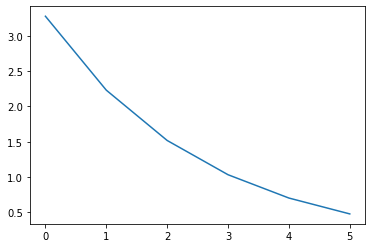

In [39]:
import matplotlib.pyplot as plt

# print(trains_MSE1)
epoch = [i for i in range(len(trains_MSE1))]
plt.plot(epoch, trains_MSE1)